In [1]:

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(style="whitegrid")
from sklearn.cluster import KMeans

# DataFrame with two features and sample names
df = pd.DataFrame({
    "Sample Name": ["Sample "+str(i) for i in range(6)],
    "Feature1": [6, 5, 1, 2, 3, 4],
    "Feature2": [5, 6, 2, 1, 4, 3],
})


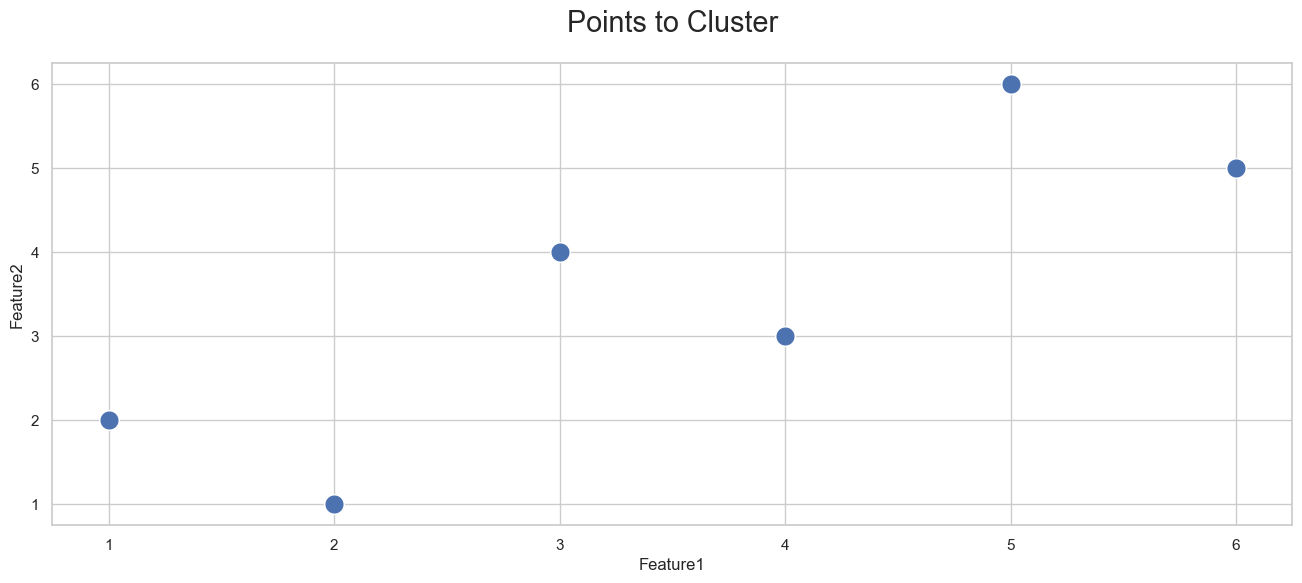

In [2]:
df

# Dataframe 2D Plot
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(data=df, x="Feature1", y="Feature2", s=200)
ax.set_title("Points to Cluster", fontsize='xx-large', y=1.05);

In [3]:
kms = KMeans(n_clusters=3, random_state=1).fit(df[['Feature1', 'Feature2']])
df['Cluster'] = kms.labels_
df['Cluster Centroid D1'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][0])
df['Cluster Centroid D2'] = df['Cluster'].apply(lambda label: kms.cluster_centers_[label][1])
df

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Sample Name,Feature1,Feature2,Cluster,Cluster Centroid D1,Cluster Centroid D2
0,Sample 0,6,5,2,5.5,5.5
1,Sample 1,5,6,2,5.5,5.5
2,Sample 2,1,2,1,1.5,1.5
3,Sample 3,2,1,1,1.5,1.5
4,Sample 4,3,4,0,3.5,3.5
5,Sample 5,4,3,0,3.5,3.5


In [4]:
features = df.columns.tolist()[1:-1]
print(f"Features: \n{features}")

centroids = kms.cluster_centers_
print(f"Centroids \n{centroids}")

Features: 
['Feature1', 'Feature2', 'Cluster', 'Cluster Centroid D1']
Centroids 
[[3.5 3.5]
 [1.5 1.5]
 [5.5 5.5]]


In [5]:
sorted_centroid_features_idx = centroids.argsort(axis=1)[:,::-1]
print(f"Sorted Feature/Dimension Indexes for Each Centroid in Descending Order: \n{sorted_centroid_features_idx}")

print()

sorted_centroid_features_values = np.take_along_axis(centroids, sorted_centroid_features_idx, axis=1)
print(f"Sorted Feature/Dimension Values for Each Centroid in Descending Order: \n{sorted_centroid_features_values}")

Sorted Feature/Dimension Indexes for Each Centroid in Descending Order: 
[[1 0]
 [1 0]
 [1 0]]

Sorted Feature/Dimension Values for Each Centroid in Descending Order: 
[[3.5 3.5]
 [1.5 1.5]
 [5.5 5.5]]


In [7]:
first_features_in_centroid_1 = centroids[0][sorted_centroid_features_idx[0]]
print(list(
        zip(
            [features[feature] for feature in sorted_centroid_features_idx[0]], 
            first_features_in_centroid_1
        )
    ))
    

[('Feature2', 3.5), ('Feature1', 3.5)]


In [10]:
df.loc[[4,5], ["Feature1"]] += df.loc[[4,5], ["Feature1"]] + 30 

In [11]:
df

,Sample Name,Feature1,Feature2,Cluster,Cluster Centroid D1,Cluster Centroid D2
0,Sample 0,6,5,2,5.5,5.5
1,Sample 1,5,6,2,5.5,5.5
2,Sample 2,1,2,1,1.5,1.5
3,Sample 3,2,1,1,1.5,1.5
4,Sample 4,102,4,0,3.5,3.5
5,Sample 5,106,3,0,3.5,3.5


In [9]:
df.loc[[4,5], ["Feature1"]]

,Feature1
4,36
5,38
